In [21]:
# Import python packages:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

# Import dataset:
df = pd.read_csv(r'Credit_Card_Applications.csv')

In [22]:
# Check first 5 rows of data:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Feature Scaling

In [23]:
# Split data to X and Y variables:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Instaniate MinxMax Scaler:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

Training SOM

In [24]:
# Training the SOM:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

# Initalize weights for data (Step 3):
som.random_weights_init(X)

# Train Self Organizing Map Model: Set to 100 iterations
som.train_random(X, num_iteration=100)

Visualize Results: Mean Interneuron Distance (MID)
* The Mean Interneuron Distance (MID) of a specific winning node is the average distance of all the neurons surrounding the winning node within a neighborhood defined by our sigma parameter. The sigma parameter represents the radius of this neighborhood. A higher MID indicates that the winning node is farther away from its neighbors within the neighborhood. Essentially, the higher the MID, the more likely the winning node is an outlier. This is how we will determine potential fraud: nodes with a high MID are flagged as possible fraudulent activities.

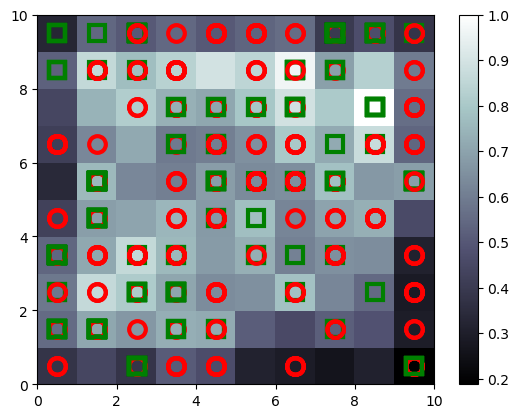

In [25]:
bone()
pcolor(som.distance_map().T)
colorbar()
# Add markers

# Create vector of markers:
markers = ['o', 's']

# Add colors for symbols
colors = ['r', 'g']

# Loop through all customers
for i, x in enumerate(X):
    # Get winning node
    w = som.winner(x)
    plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 12,
        markeredgewidth = 3)

show()


Finding Customers Flagged As Fraud

In [43]:
# Get the mappings of the input data to their winning nodes in the SOM
mappings = som.win_map(X)

frauds = np.concatenate((mappings[(9,7)], mappings[(7,8)]), axis = 0)
# Inverse scaling
frauds = sc.inverse_transform(frauds)

# Convert the frauds array into a DataFrame
fraud_df = pd.DataFrame(frauds, columns=df.columns[:-1])  # Use appropriate column names from your dataset

# Display the DataFrame
fraud_df['CustomerID']


0     15594305.0
1     15664793.0
2     15670029.0
3     15662189.0
4     15568469.0
5     15586479.0
6     15717700.0
7     15705379.0
8     15646535.0
9     15768600.0
10    15708714.0
11    15808023.0
12    15808386.0
13    15786539.0
Name: CustomerID, dtype: float64